# Fruit Classification Dataset – Project Overview

## Introduction

This notebook presents a classification project using a curated image dataset containing five categories of fruits: apples, bananas, grapes, mangoes, and strawberries. The dataset is designed to support research and development in image classification, with a particular focus on computer vision applications in agriculture and food technology.

The images exhibit a wide range of shapes, colors, and lighting conditions, making the dataset suitable for developing models that generalize well to real-world scenarios. Potential applications include fruit recognition systems, quality grading, and automated sorting in the agricultural sector.

## Dataset Description

The dataset comprises a total of 10,000 RGB images, evenly distributed across the five fruit classes:

- Apple  
- Banana  
- Grape  
- Mango  
- Strawberry  

Each class contains 2,000 images captured in various conditions to increase diversity and robustness in model training.

### Data Distribution

The dataset is organized into three subsets based on a common training-validation-testing split:

- **Training Set**: 97% of the data (9,700 images)  
- **Validation Set**: 2% of the data (200 images)  
- **Test Set**: 1% of the data (100 images)

Each fruit class is proportionally represented in all three subsets. For example, the "Apple" class includes 1,940 training images, 40 validation images, and 20 test images. This consistent class distribution ensures balanced learning and reliable evaluation.



## Potential Use Cases

This dataset is well-suited for:

- Image classification tasks using CNNs and transfer learning
- Benchmarking and comparison of machine learning models
- Research in agricultural automation systems
- Educational projects involving practical deep learning implementations

The dataset supports experimentation with feature extraction techniques, dimensionality reduction (e.g., PCA, t-SNE), and evaluation metrics such as accuracy and confusion matrices.

### Source

The dataset is available on Kaggle under the name[ **"fruits-classification"**](http://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification) and is structured to allow for efficient loading via Keras `ImageDataGenerator` or custom pipelines for CNN feature extraction.(www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing the required libraries**

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from random import random
from random import seed
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization

from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
!pip install keras-tuner
import keras_tuner
from keras_tuner import RandomSearch
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tqdm import tqdm
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input




from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

2025-07-09 06:33:19.111695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752042799.133976     255 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752042799.140782     255 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Directory Paths**

In [2]:
folder_path="/kaggle/input/fruits-classification/Fruits Classification"
train='/kaggle/input/fruits-classification/Fruits Classification/train'
test='/kaggle/input/fruits-classification/Fruits Classification/test'
valid='/kaggle/input/fruits-classification/Fruits Classification/valid'

## Exploratory Data Analysis (EDA) & Visualization

Before building and training models, I conducted an initial exploratory analysis to understand the dataset and its distribution. This included a variety of visualizations and summary statistics to inspect both the class balance and pixel-level characteristics of the images.

### 1. Class Distribution

To verify that the dataset is balanced across categories, I used a count plot to visualize the number of images in each fruit class. As expected, each class contained an equal number of samples (2,000), confirming the dataset is well-balanced and suitable for classification tasks without requiring oversampling or augmentation.

### 2. Sample Images per Category

A small grid of sample images from each class was displayed to qualitatively assess visual diversity. This helped confirm that the dataset includes natural variability such as different lighting conditions, angles, and backgrounds, which is beneficial for building robust models.

### 3. Image Dimensions and Data Inspection

I printed out image shapes and dataset sizes to confirm that all images were consistent in dimensions and properly formatted for model ingestion. Most images were RGB with varying resolutions, later resized to a standard input shape (e.g., 224×224×3) during preprocessing.

### 4. RGB Channel Distribution

To understand the color composition of the dataset, I plotted RGB histograms for each category. This helped identify dominant color profiles for different fruits — for example, a high red-channel presence for strawberries and apples, and a yellow-green peak for bananas and mangoes.

### 5. Pixel Intensity Histogram (Per Category)

I also created histograms of pixel intensities for each class to analyze brightness and contrast variations within categories. These visualizations provide insight into image quality and can guide preprocessing steps such as normalization or histogram equalization if needed.

---

Overall, the data visualizations provided valuable insights into class balance, image variability, and pixel-level characteristics, ensuring the dataset is clean, diverse, and ready for training.

In [3]:
train_label, train_path=[],[]
for  label in os.listdir(train):
    label_path=train+f'/{label}'
    for image in os.listdir(label_path):
        train_label.append(label)
        train_path.append(label_path+f'/{image}')
    
    

**Preparing data for EDA and Data Visualization**

In [4]:
train_data=pd.DataFrame({'label':train_label, 'path':train_path})
train_data['array']=[np.array(Image.open(f)) for f in train_data['path']]
train_data['size']=[f.shape for f in train_data['array']]
train_data.head(8)


,label,path,array,size
0,Apple,/kaggle/input/fruits-classification/Fruits Cla...,"[[[210, 206, 197], [210, 206, 197], [210, 206,...","(203, 249, 3)"
1,Apple,/kaggle/input/fruits-classification/Fruits Cla...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","(240, 210, 3)"
2,Apple,/kaggle/input/fruits-classification/Fruits Cla...,"[[[32, 31, 3], [53, 49, 22], [42, 35, 7], [81,...","(259, 194, 3)"
3,Apple,/kaggle/input/fruits-classification/Fruits Cla...,"[[[203, 205, 202], [221, 223, 220], [234, 236,...","(183, 275, 3)"
4,Apple,/kaggle/input/fruits-classification/Fruits Cla...,"[[[111, 146, 114], [128, 163, 131], [137, 172,...","(194, 259, 3)"
5,Apple,/kaggle/input/fruits-classification/Fruits Cla...,"[[[20, 16, 15], [26, 25, 23], [7, 7, 7], [1, 5...","(183, 275, 3)"
6,Apple,/kaggle/input/fruits-classification/Fruits Cla...,"[[[56, 65, 46], [104, 112, 91], [99, 104, 82],...","(175, 175, 3)"
7,Apple,/kaggle/input/fruits-classification/Fruits Cla...,"[[[40, 53, 7], [74, 88, 39], [53, 65, 17], [83...","(190, 265, 3)"


In [5]:
print(f'Number of samples:{len(train_data)}')

Number of samples:9700


**Data Distribution across all categories**

<Axes: xlabel='label', ylabel='count'>

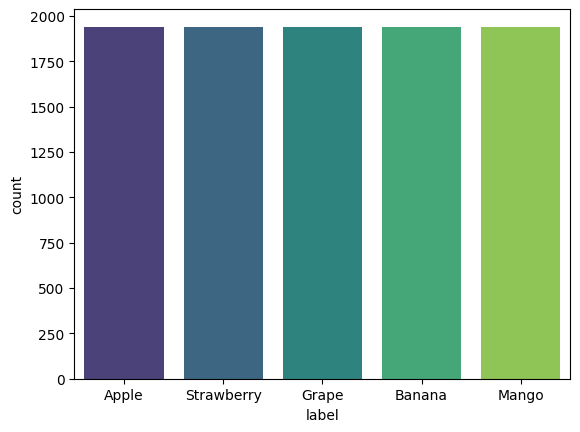

In [6]:
sns.countplot(x=train_data['label'], palette='viridis')

**Data Visualization**

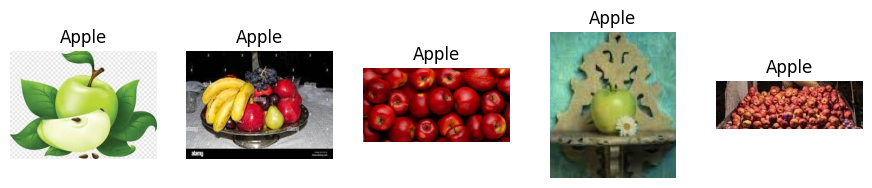

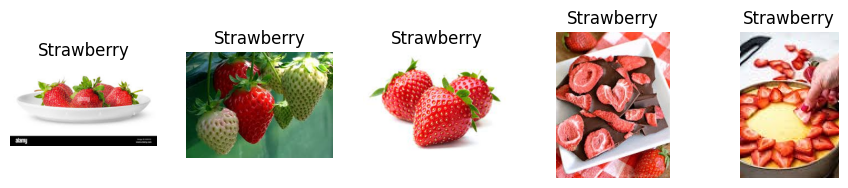

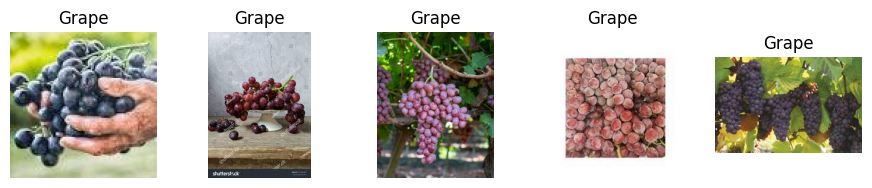

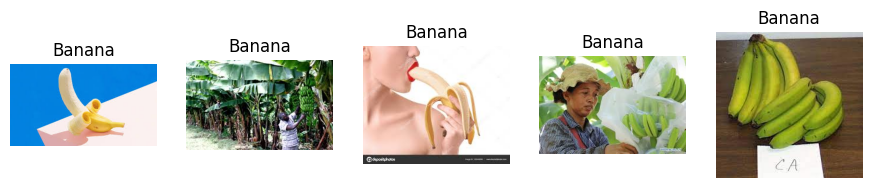

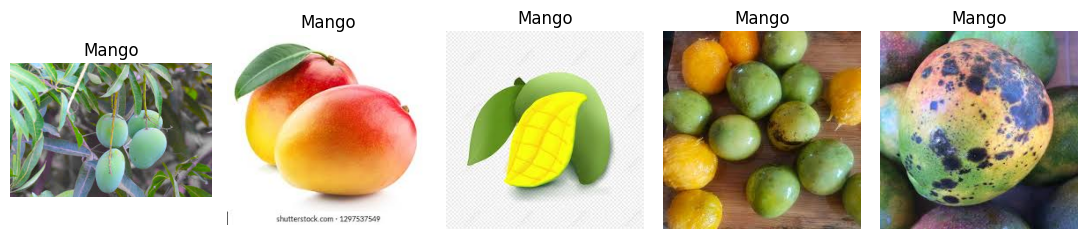

In [7]:
labels=['Apple', 'Strawberry', 'Grape', 'Banana', 'Mango']

def display(x,label):
    n=1
    plt.figure(figsize=(11,11))
    
    for i in range(x,x+5):
        plt.subplot(5,5,n)
        plt.imshow(train_data['array'].iloc[i+5])
        plt.title(labels[label])
        plt.axis('off')
        n+=1
    
  

display(5,0)

display(2005,1)

display(4005,2)

display(6005,3)

display(8005,4)

plt.tight_layout()
plt.show()

**RGB distribution for all Classes**

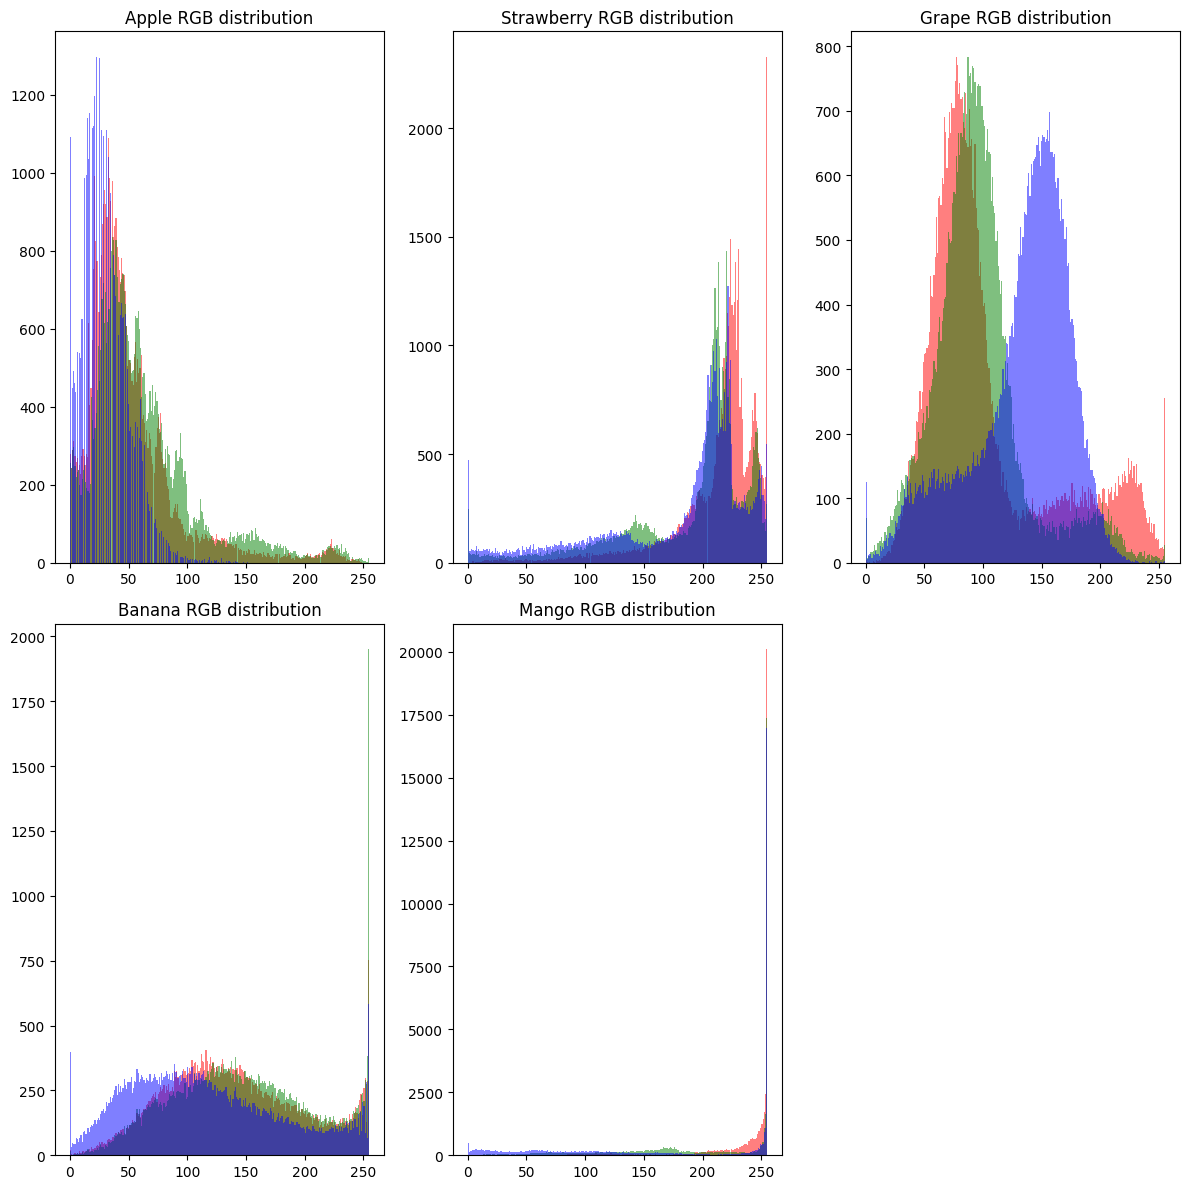

In [8]:

def rgb_plot(label,index_num,i):
    colors=['r', 'g', 'b']
    plt.subplot(2,3,i)
    for i,c in enumerate(colors):
        plt.hist(train_data['array'].iloc[index_num][...,i].ravel(), color=c, bins=256, alpha=0.5)
        plt.title(f'{label} RGB distribution')
    
plt.figure(figsize=(12,12))
rgb_plot('Apple',19,1)
rgb_plot('Strawberry',2900,2)
rgb_plot('Grape',4900,3)
rgb_plot('Banana',7009,4)
rgb_plot('Mango',8011,5)

plt.tight_layout()
plt.show()

The rgb plot of all the different labels is pretty different from one another but as I'm using only one image per category it is not at all enough to make any valuable insights.

**Pixel Distribution Visualization**

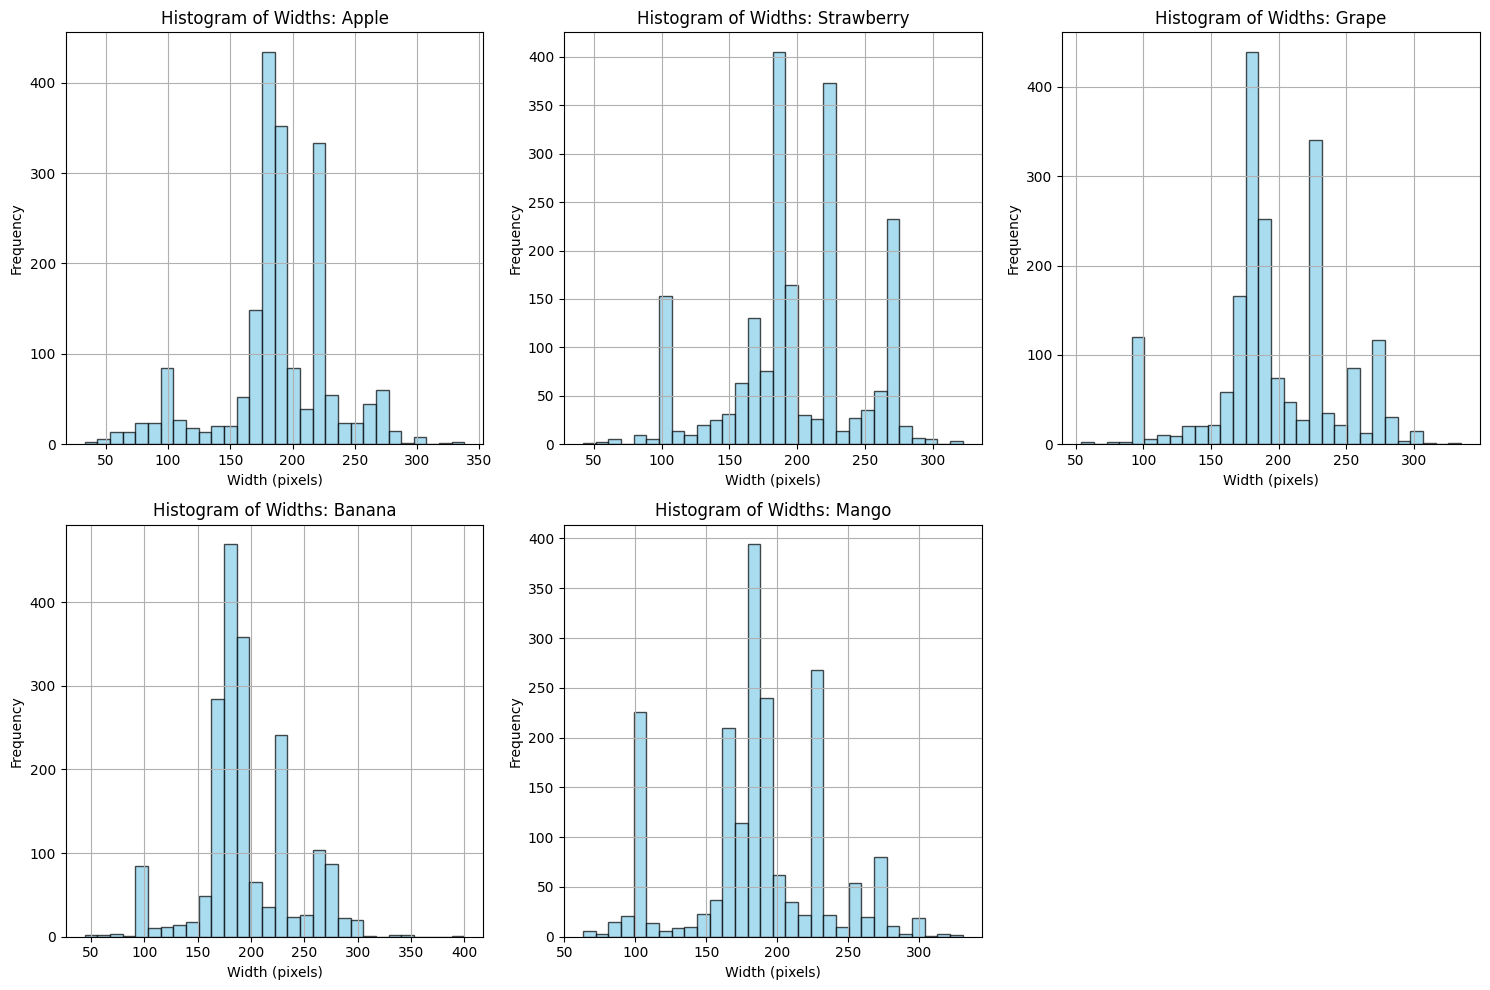

In [9]:
import matplotlib.pyplot as plt

class_labels = train_data['label'].unique()
num_classes = len(class_labels)

plt.figure(figsize=(15, 10))

for i, label in enumerate(class_labels):
    plt.subplot(2, 3, i + 1)  # arrange subplots in 2 rows, 3 columns (adjust if needed)
    class_sizes = train_data[train_data['label'] == label]['size'].apply(lambda x: x[0])  # width
    
    plt.hist(class_sizes, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of Widths: {label}")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()



**Data Preprocessing and Data Loader Setup**

This section handles data normalization, directory loading, and sets up the `ImageDataGenerator` for both training and validation datasets. Images are resized to 224×224, normalized to a [0,1] range, and class labels are encoded categorically. This forms the input pipeline for training and evaluation.


In [10]:
# Set the seed for reproducibility
np.random.seed(1)
tf.random.set_seed(1)

# Set the dataset and model parameters
data_dir = '/kaggle/input/fruits-classification/Fruits Classification'
image_width = 224
image_height = 224
channels = 3
batch_size = 32
random_seed = 1

# Data augmentation and preprocessing
data_generator = ImageDataGenerator(rescale=1.0 / 255)

train_data = data_generator.flow_from_directory(directory="/kaggle/input/fruits-classification/Fruits Classification/train",target_size=(image_width, image_height), batch_size=batch_size,class_mode='categorical',subset='training',shuffle=True,seed=random_seed)

validation_data = data_generator.flow_from_directory(directory="/kaggle/input/fruits-classification/Fruits Classification/valid",target_size=(image_width, image_height),batch_size=batch_size,class_mode='categorical',subset='validation',shuffle=True,seed=random_seed)

class_names = sorted(train_data.class_indices.keys())

train_datagen = ImageDataGenerator(rescale=1./255)

# Validation data generator without augmentation (only normalization)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directory
train_data = train_datagen.flow_from_directory(
    '/kaggle/input/fruits-classification/Fruits Classification/train',             # path to training data
    target_size=(224, 224),    # resize all images
    batch_size=32,
    class_mode='categorical'   # or 'binary' for 2 classes
)

validation_data = val_datagen.flow_from_directory(
    '/kaggle/input/fruits-classification/Fruits Classification/valid',               # path to validation data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 9700 images belonging to 5 classes.
Found 0 images belonging to 5 classes.
Found 9700 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [11]:
#Methods for Visualizing Data
import matplotlib.pyplot as plt

def plot(history):
    if hasattr(history, 'history'):
        history = history.history  # unwrap if it's a Keras History object

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train')
    plt.plot(history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train')
    plt.plot(history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


    

### Model Architectures

We experimented with several deep learning models:


- **Simple CNN + BatchNorm**: Enhanced version with BatchNormalization layers for better convergence.
- **MobileNetV2 + Data Augmentation**: Same as above, but with data augmentation applied.
- **MobileNetV2 + Hyperparameter Tuning**: Tuned using Keras Tuner with optimizers like Adam, RMSprop, etc.
- **VGG16 + SVM and Random Forest**: CNN feature extractor + classical SVM classifier. This model yielded the best performance.
- **VGG16 + PCA**: Used for visualizing feature distribution after dimensionality reduction.


***CNN with BatchNormalization***

In [12]:
# Define the CNN model architecture with batch normalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(class_names), activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752042841.176099     255 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752042841.176702     255 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,602,821 (9.93 MB)

 Trainable params: 2,601,861 (9.93 MB)

 Non-trainable params: 960 (3.75 KB)

In [13]:
history1=model.fit(train_data,epochs=15,validation_data=validation_data)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1752042847.094489     342 service.cc:148] XLA service 0x7b7c04007930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752042847.094538     342 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752042847.094546     342 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752042847.560553     342 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/304 ━━━━━━━━━━━━━━━━━━━━ 22s 76ms/step - accuracy: 0.3359 - loss: 2.4763 

I0000 00:00:1752042853.342564     342 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


304/304 ━━━━━━━━━━━━━━━━━━━━ 37s 84ms/step - accuracy: 0.4934 - loss: 1.3745 - val_accuracy: 0.3200 - val_loss: 1.9961
Epoch 2/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6375 - loss: 0.9441 - val_accuracy: 0.5550 - val_loss: 1.1329
Epoch 3/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - accuracy: 0.6786 - loss: 0.8282 - val_accuracy: 0.6750 - val_loss: 0.9066
Epoch 4/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.7131 - loss: 0.7516 - val_accuracy: 0.5450 - val_loss: 1.2125
Epoch 5/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - accuracy: 0.7649 - loss: 0.6313 - val_accuracy: 0.6000 - val_loss: 1.1304
Epoch 6/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.8103 - loss: 0.5215 - val_accuracy: 0.6350 - val_loss: 1.1240
Epoch 7/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - accuracy: 0.8464 - loss: 0.4397 - val_accuracy: 0.6900 - val_loss: 0.7934
Epoch 8/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.9047 - loss: 0.2851 - val_accurac

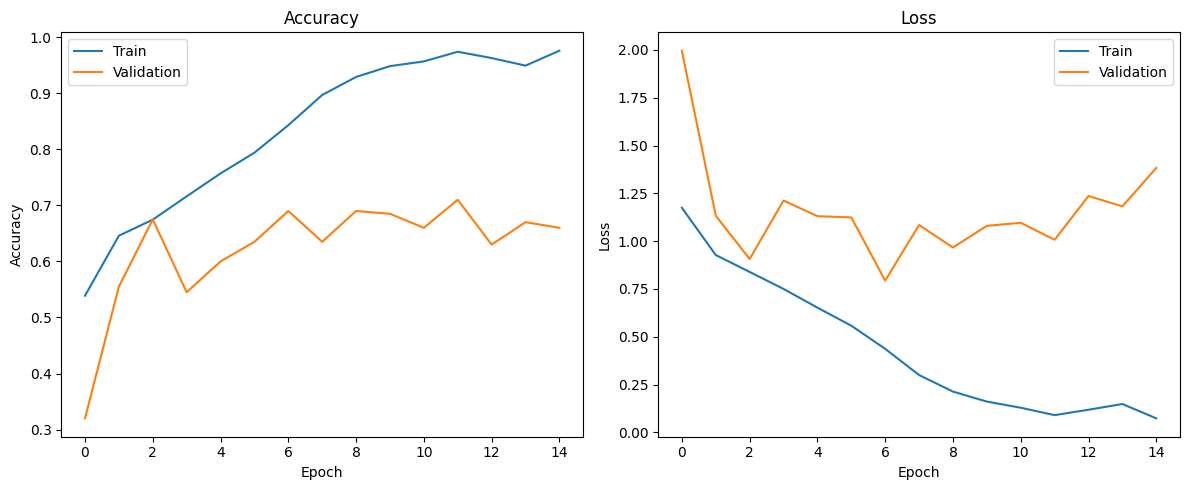

In [14]:
plot(history1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


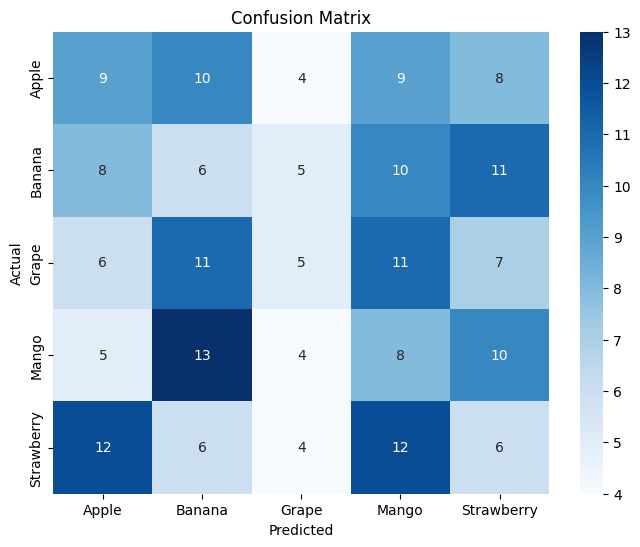

In [15]:
y_true=validation_data.classes
y_prob=model.predict(validation_data)
y_pred=np.argmax(y_prob, axis=1)
class_names=list(validation_data.class_indices.keys())
plot_confusion_matrix(y_true, y_pred, class_names)

### Data Augmentation

To improve model generalization and reduce overfitting, we applied data augmentation using transformations such as random rotations, flips, zooms, and shifts. This artificially increases dataset diversity and helps the model become more robust to unseen inputs.

We used `ImageDataGenerator` with the following augmentations:
- Horizontal and vertical flips
- Random zoom and width/height shifts
- Rescaling pixel values

This was particularly effective when used with MobileNetV2.

## Transfer Learning with Pretrained Models

To leverage the power of deep learning without training a model from scratch, I employed **transfer learning** using the pretrained **MobileNetV2** architecture. This model has been trained on the ImageNet dataset and captures rich feature representations that generalize well across various image classification tasks.

By removing the top classification layer and fine-tuning the deeper layers for my fruit classification task, I was able to achieve significantly better results compared to training a model from scratch. This approach is not only computationally efficient but also improves model performance, especially on smaller datasets like this one.

Combining MobileNetV2 with data augmentation further enhanced its ability to generalize to unseen images.


**MobileNetV2(Transfer Learning) with Data Augmentation**

In [16]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data generator without augmentation (only normalization)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directory
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/fruits-classification/Fruits Classification/train',             # path to training data
    target_size=(224, 224),    # resize all images
    batch_size=32,
    class_mode='categorical'   # or 'binary' for 2 classes
)

validation_generator = val_datagen.flow_from_directory(
    '/kaggle/input/fruits-classification/Fruits Classification/valid',               # path to validation data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 9700 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [18]:
# Model using MobileNetV2 architecture
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_width, image_height, channels))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(class_names), activation='softmax'))

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       8,028,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,286,917 (39.24 MB)

 Trainable params: 8,028,933 (30.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [19]:
# Training the model
history4=model.fit(train_generator,epochs=15,validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 123s 367ms/step - accuracy: 0.6273 - loss: 2.1867 - val_accuracy: 0.8200 - val_loss: 0.5646
Epoch 2/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 102s 336ms/step - accuracy: 0.7794 - loss: 0.6117 - val_accuracy: 0.8500 - val_loss: 0.4273
Epoch 3/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 102s 337ms/step - accuracy: 0.8001 - loss: 0.5271 - val_accuracy: 0.8350 - val_loss: 0.5205
Epoch 4/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 101s 334ms/step - accuracy: 0.8165 - loss: 0.4977 - val_accuracy: 0.8600 - val_loss: 0.4540
Epoch 5/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 102s 336ms/step - accuracy: 0.8168 - loss: 0.4836 - val_accuracy: 0.8450 - val_loss: 0.4389
Epoch 6/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 104s 341ms/step - accuracy: 0.8476 - loss: 0.4236 - val_accuracy: 0.8700 - val_loss: 0.3848
Epoch 7/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 102s 334ms/step - accuracy: 0.8519 - loss: 0.3998 - val_accuracy: 0.8450 - val_loss: 0.4663
Epoch 8/15
304/304 ━━━━━━━━━━━━━━━━━━━━ 102s 336ms/step - accuracy: 0.8515 -

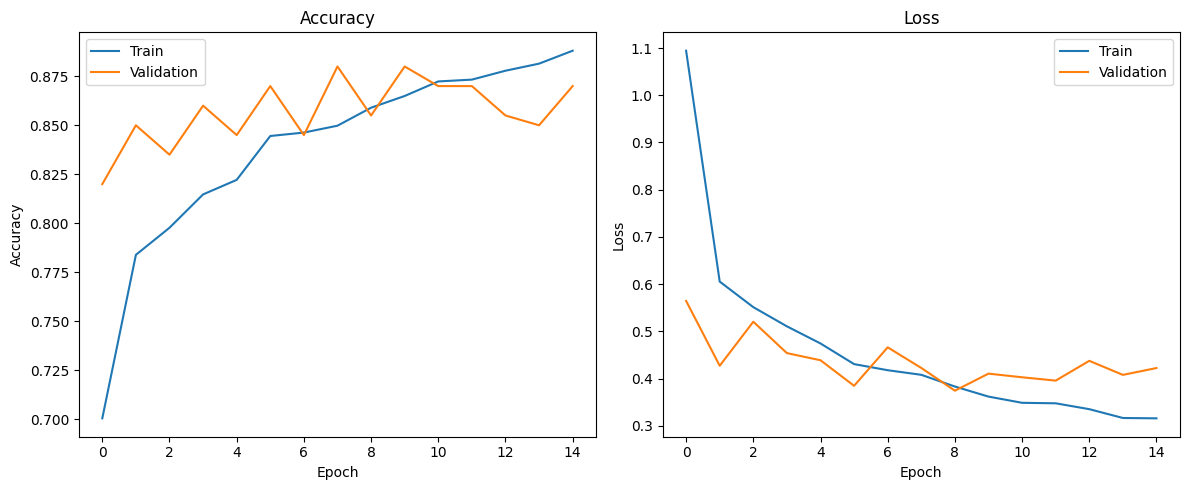

In [20]:
plot(history4)

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 578ms/step


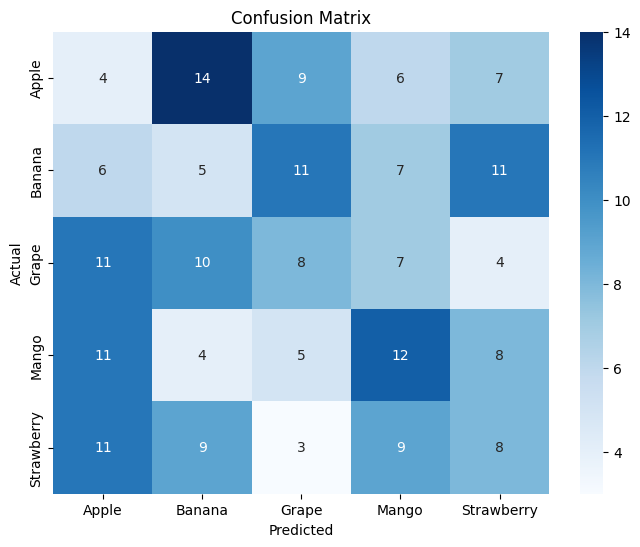

In [21]:
y_true=validation_generator.classes
y_prob=model.predict(validation_generator)
y_pred=np.argmax(y_prob, axis=1)
class_names=list(validation_generator.class_indices.keys())
plot_confusion_matrix(y_true, y_pred, class_names)

### Hyperparameter Tuning

I used `RandomSearch` from Keras Tuner to optimize the MobileNetV2 model. The search space included optimizers such as `adam`, `rmsprop`, `nadam`, and others.

Each trial ran for 10 epochs, and the best hyperparameters were selected based on validation accuracy.

This process helped improve performance compared to using default settings.

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import AUC  # Better to import from tensorflow.keras

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

In [23]:
# Defining the model architecture
def build_finetune_model(hp):
    base_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=(image_width, image_height, channels))

    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(len(class_names), activation='softmax'))

    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'nadam', 'adadelta'])
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [25]:

# Performing hyperparameter tuning
tuner = RandomSearch(build_finetune_model,objective='val_accuracy',max_trials=3,executions_per_trial=1,directory='./',project_name='fruit_classification')

tuner.search(train_data,epochs=10,validation_data=validation_data, callbacks=[early_stop, reduce_lr, checkpoint])

best_hyperparameters = tuner.get_best_hyperparameters()[0].values
best_model = tuner.get_best_models(num_models=1)[0]

print("Best Hyperparameters:", best_hyperparameters)

Trial 3 Complete [00h 01m 30s]
val_accuracy: 0.8600000143051147

Best val_accuracy So Far: 0.8600000143051147
Total elapsed time: 00h 04m 27s
Best Hyperparameters: {'optimizer': 'rmsprop'}


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 4 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### VGG16(Pretrained Model) with Supervised Learning

In this approach, I used VGG16, a well-established deep CNN architecture pre-trained on ImageNet, as a fixed feature extractor. By removing the fully connected layers and extracting high-level features from the convolutional base, I was able to leverage the representational power of VGG16 without retraining the entire network.

The extracted features were then passed to traditional supervised learning algorithms—Random Forest and Support Vector Machine (SVM)—for classification. Among these, the SVM model provided the best performance across all experiments, achieving the highest accuracy on the validation set.

This method effectively combined deep learning's feature extraction capabilities with classical machine learning's simplicity and interpretability, resulting in a highly accurate and efficient classification pipeline.


In [28]:
def extract_features_with_generator(data_dir, batch_size=32):
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    data_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=False
    )

    print(f"\nExtracting features from: {data_dir}")
    features = feature_extractor.predict(data_generator, verbose=1)
    labels = data_generator.classes
    image_paths = data_generator.filepaths
    class_names = list(data_generator.class_indices.keys())
    
    return features, labels, image_paths, class_names


In [32]:

# Load pretrained MobileNetV2 without top
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
feature_extractor = Model(inputs=base_model.input, outputs=x)


# Set dataset paths
train_dir = '/kaggle/input/fruits-classification/Fruits Classification/train'
valid_dir = '/kaggle/input/fruits-classification/Fruits Classification/valid'

# Extract CNN features
X_train, y_train,_,_= extract_features_with_generator(train_dir)
X_test, y_test,_,_ = extract_features_with_generator(valid_dir)

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, clf_rf.predict(X_test))

# SVM
clf_svm = SVC(kernel='rbf')
clf_svm.fit(X_train, y_train)
acc_svm = accuracy_score(y_test, clf_svm.predict(X_test))

# Results 
print("\n Model Evaluation Results (Memory-Efficient):")
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"SVM Accuracy:           {acc_svm:.4f}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 9700 images belonging to 5 classes.

Extracting features from: /kaggle/input/fruits-classification/Fruits Classification/train


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 68s 221ms/step
Found 200 images belonging to 5 classes.

Extracting features from: /kaggle/input/fruits-classification/Fruits Classification/valid
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step

 Model Evaluation Results (Memory-Efficient):
Random Forest Accuracy: 0.8550
SVM Accuracy:           0.9300


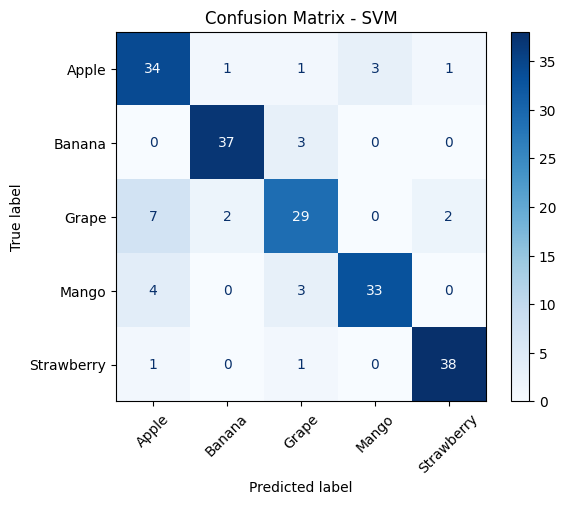

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Predict on test set
y_pred = clf_rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


Using VGG16 as a fixed feature extractor, I extracted deep convolutional features from the dataset and trained two classical machine learning models—Random Forest and SVM—on top of these features. This approach proved to be very effective and memory-efficient, especially on a constrained environment like Kaggle Notebooks.

The Random Forest model achieved an accuracy of **85.50%**, while the Support Vector Machine (SVM) significantly outperformed it with an impressive **93.00%** accuracy on the validation set. These results highlight the strength of combining pretrained CNNs with robust supervised learning algorithms for image classification tasks, particularly when computational resources are limited.


### VGG19 + PCA For Data Visualization

Since VGG16 gives good results, I used the VGG19 model pretrained on ImageNet as a feature extractor by removing the top classification layers. The CNN-extracted features from the training and test sets were then reduced in dimensionality using Principal Component Analysis (PCA).

PCA helped in visualizing high-dimensional CNN features in 2D and 3D space, making it easier to interpret how well the model separates the different fruit categories. It also served as a preprocessing step before applying classical classifiers like SVM and Random Forest.

While PCA itself wasn't used to improve classification performance directly, it provided useful insights into the structure and separability of the feature space created by VGG19. This helped explain why the VGG19 + SVM model achieved such strong results.

Found 9700 images belonging to 5 classes.

Extracting features from: /kaggle/input/fruits-classification/Fruits Classification/train


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 68s 220ms/step
Found 200 images belonging to 5 classes.

Extracting features from: /kaggle/input/fruits-classification/Fruits Classification/valid
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step

 Performing PCA...


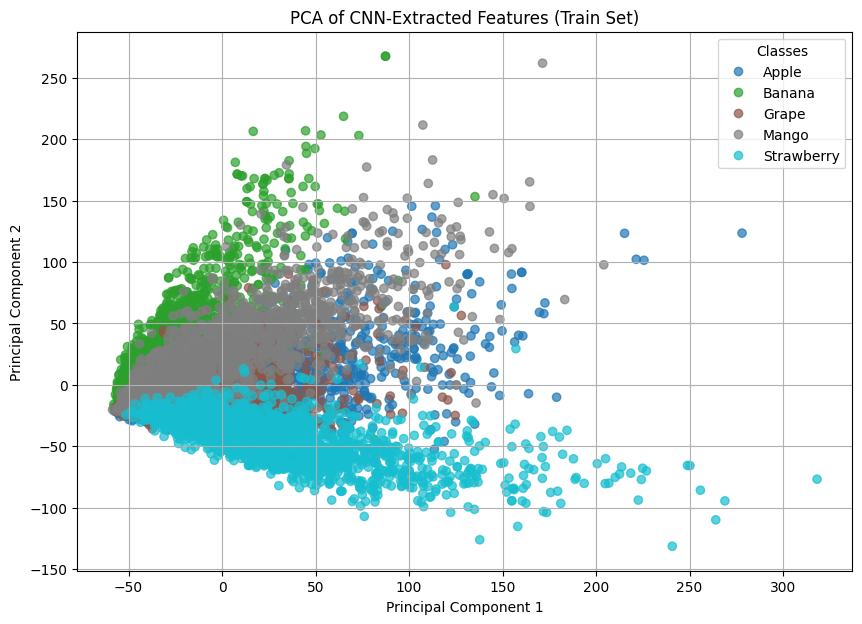

In [35]:

from sklearn.decomposition import PCA

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
feature_extractor = Model(inputs=base_model.input, outputs=x)

train_dir = '/kaggle/input/fruits-classification/Fruits Classification/train'
valid_dir = '/kaggle/input/fruits-classification/Fruits Classification/valid'


X_train, y_train, _,class_names = extract_features_with_generator(train_dir)
X_test, y_test, _,_ = extract_features_with_generator(valid_dir)


print("\n Performing PCA...")
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=class_names, title="Classes", loc="best")
plt.title("PCA of CNN-Extracted Features (Train Set)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


I can only see three classes in distinct clusters which is not the best result but I can also see the other classes behind the clusters which tells me that if the data was visualized in more dimensions we'd probably be able to see the clusetrs more clearly

### Model Comparision and Conclusion

Throughout this project, I experimented with multiple deep learning architectures and hybrid approaches to solve the fruit classification problem. The models were trained and evaluated using a dataset of five fruit categories: Apple, Banana, Grape, Mango, and Strawberry.

The table below summarizes the performance of each model on validation accuracy:

| Model                              | Accuracy  |
|-----------------------------------|-----------|
| Simple CNN + Batch Normalization  | 71.00%    |
| MobileNetV2 + Data Augmentation   | 88.00%    |
| MobileNetV2 + Hyperparameter Tuning | 86.00%  |
| VGG16 + Random Forest             | 85.50%    |
| **VGG16 + SVM (Best)**            | **93.00%**|

Among all models, the combination of VGG16 with an SVM classifier gave the best results with 93% accuracy. This indicates that using a pretrained CNN as a feature extractor combined with a classical machine learning algorithm can be highly effective.

### Future Work

There are several ways this work can be extended or improved:

- **Fine-tuning pretrained models**: Unfreezing deeper layers of VGG16 or other CNNs could allow the network to adapt more specifically to the fruit dataset.
- **Data augmentation**: Although some augmentation was applied, exploring more advanced or automated augmentation techniques could improve generalization.
- **Ensemble learning**: Combining predictions from top-performing models might improve overall accuracy and reduce overfitting.
- **Evaluation on real-world data**: Testing the model on new, real-world images could help evaluate its robustness outside the dataset.

These improvements could lead to a more accurate, efficient, and production-ready classification system.

Found 100 images belonging to 5 classes.

Extracting features from: /kaggle/input/fruits-classification/Fruits Classification/test


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step


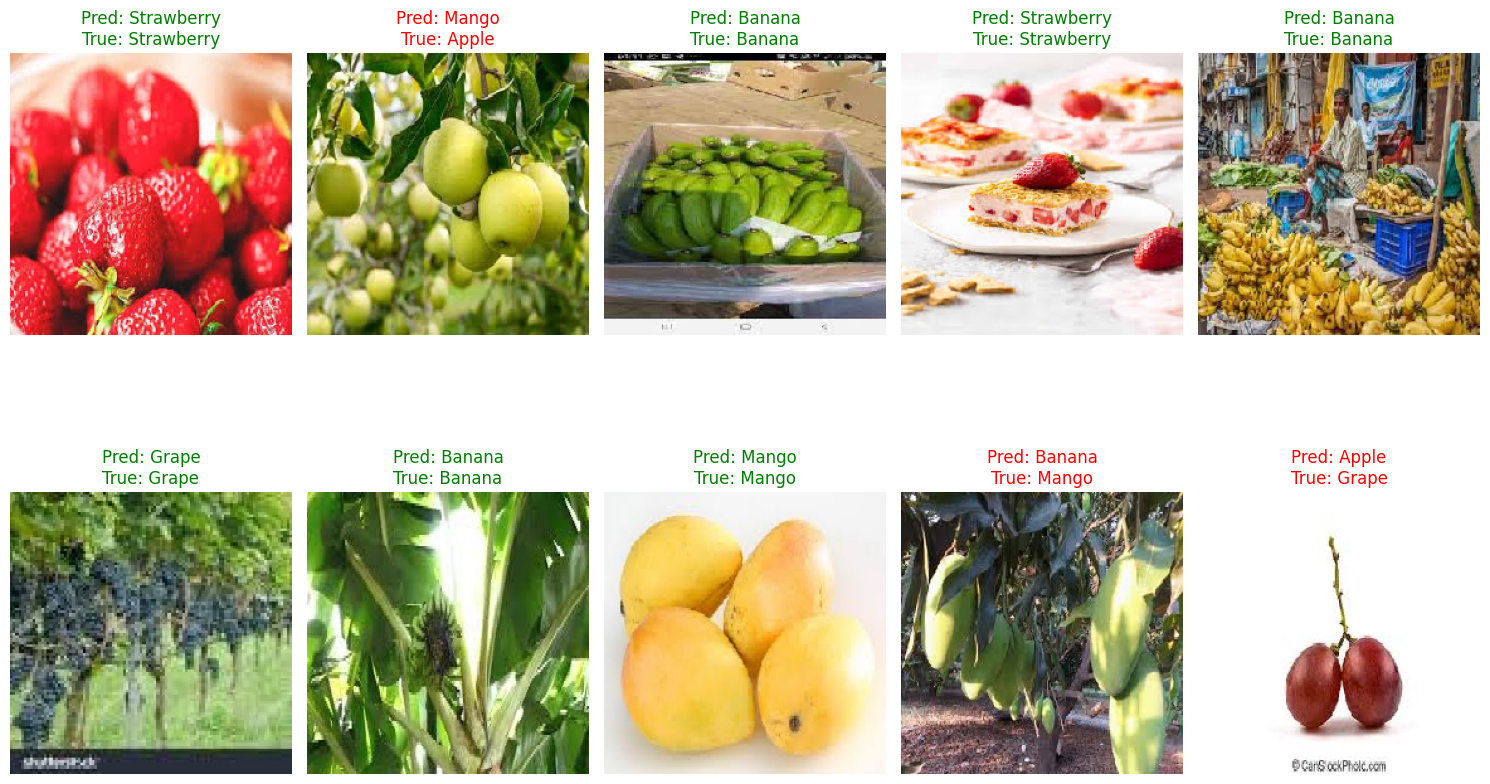

In [38]:
#Final Predictions
from tensorflow.keras.utils import load_img, img_to_array

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
feature_extractor = Model(inputs=base_model.input, outputs=x)

test_dir = '/kaggle/input/fruits-classification/Fruits Classification/test'

X_test_final, y_test_final, test_image_paths, class_names = extract_features_with_generator(test_dir)
y_pred_final = clf_rf.predict(X_test_final)


def show_predictions(image_paths, true_labels, predicted_labels, class_names, num_samples=10):
    plt.figure(figsize=(15, 10))
    indices = np.random.choice(len(image_paths), size=num_samples, replace=False)

    for i, idx in enumerate(indices):
        img = load_img(image_paths[idx], target_size=(224, 224))
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        true_cls = class_names[int(true_labels[idx])]
        pred_cls = class_names[int(predicted_labels[idx])]
        color = "green" if true_cls == pred_cls else "red"
        plt.title(f"Pred: {pred_cls}\nTrue: {true_cls}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# --- 5. Show predictions ---
show_predictions(test_image_paths, y_test_final, y_pred_final, class_names)


In [39]:
acc_svm = accuracy_score(y_test_final, y_pred_final)
print(f"The Final accuracy score for test data is :{acc_svm}")

The Final accuracy score for test data is :0.84
